In [1]:
import pandas as pd
import os
import random
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt 

from transformers import BertModel, BertTokenizer 
import torch

/Users/sachichitre/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import data
mammals = pd.read_excel('./data/promptListMammal.xlsx')
reptiles = pd.read_excel('./data/promptListReptile.xlsx')
birds = pd.read_excel('./data/promptListBird.xlsx')
bugs = pd.read_excel('./data/promptListBugs.xlsx')
fish = pd.read_excel('./data/promptListFish.xlsx')
 
#print(fish)

In [3]:
# Picking 15 random prompts from each dataset
# reptiles_15 = reptiles.sample(n=15, random_state=0)
fish_15 = fish.sample(n=15, random_state=0)
list_of_strings = fish_15[0].astype(str).tolist()

# Print the list of strings
print(list_of_strings)
# mam = mammals_15.to_string(index=False)
# mammals_sampled = mammals.sample(n=10, random_state=0)
# mammals_list = mammals_sampled.squeeze().toList()
# fish_15 = fish.sample(n=15, random_state=0)
# bugs_15 = bugs.sample(n=15, random_state=0)
# birds_15 = birds.sample(n=15, random_state=0)
print(fish_15)
type(fish_15)
# type(mammals_list)

['Is a Ratfish a fish?', 'Is a Tadpole fish a fish?', 'Is a Prowfish a fish?', 'Is a Elephantnose fish a fish?', 'Is a Sand diver a fish?', 'Is a Porgy a fish?', 'Is a Weeverfish a fish?', 'Is a Bigeye squaretail a fish?', 'Is a Treefish a fish?', 'Is a Tripletail a fish?', 'Is a Lampfish a fish?', 'Is a Yellowedge grouper (Hyporthodus flavolimbatus) a fish?', 'Is a Armored searobin a fish?', 'Is a Yellowhead jawfish a fish?', 'Is a Trevally a fish?']
                                                      0
708                                Is a Ratfish a fish?
937                           Is a Tadpole fish a fish?
692                               Is a Prowfish a fish?
303                      Is a Elephantnose fish a fish?
780                             Is a Sand diver a fish?
686                                  Is a Porgy a fish?
1024                            Is a Weeverfish a fish?
85                       Is a Bigeye squaretail a fish?
979                               Is a T

pandas.core.frame.DataFrame

In [4]:
# Load pre-trained BertModel and BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') 
model = BertModel.from_pretrained('bert-base-uncased' ) 

In [5]:
# Function to find the animal name between "a" or "an" and "mammal" using vector embeddings
def find_animal_name_embeddings(prompt):
    # Tokenize the prompt
    inputs = tokenizer(prompt, return_tensors='pt')
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Get the embeddings for the prompt
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_states = outputs.last_hidden_state  # Shape: (num_tokens, embedding_size)
#         sentence_embedding = torch.mean(last_hidden_states, dim=1) 
#         embedding_array = sentence_embedding.detach().numpy()
    
    # Define the target words
    target_start_words = ["a", "an"]
    target_end_word = "a"

    # Initialize variables to hold the indices of the target words
    start_index = None
    end_index = None

    # Iterate through the tokens and embeddings to find the indices of the target words
    for i, token in enumerate(tokens):
        
        if token in target_start_words:
            # Check if the next token is a potential animal name
            
            for j in range(i + 1, len(tokens)):
                if tokens[j] == target_end_word:
                    start_index = i + 1
                    end_index = j
                    
                    break
#             if start_index is not None and end_index is not None:
#                 break
#     print(start_index, end_index)
     # If indices are found, calculate average embedding for the animal name
    if start_index is not None and end_index is not None:
        # Extract embeddings for the animal name
        animal_name_state = last_hidden_states[0, start_index:end_index, :]
        # Calculate mean embedding across tokens
        animal_name_embedding = animal_name_state.mean(dim=0)
        # Convert to numpy array
        animal_name_embedding_np = animal_name_embedding.detach().numpy()
        
        # Convert tokens to string
        animal_name_tokens = tokens[start_index:end_index]
        animal_name = tokenizer.convert_tokens_to_string(animal_name_tokens)
        
        return animal_name, animal_name_embedding_np
    
    # Return None if the animal name is not found
    return None, None

# Testing the function
# prompt1 = "is a brown hyena a mammal?"
# animal_name1, embeddings1 = find_animal_name_embeddings(prompt1)
# print(f"Animal name in prompt: '{animal_name1}', Embeddings shape: {embeddings1.shape}")
# print(len(embeddings1))

# prompt2 = "do you know if a platypus is a mammal?"
# animal_name2, embeddings2 = find_animal_name_embeddings(prompt2)
# print(f"Animal name in prompt: '{animal_name2}', Embeddings shape: {embeddings2.shape}")

# prompt3 = "an ostrich is a bird, but is it a mammal?"
# animal_name3, embeddings3 = find_animal_name_embeddings(prompt3)
# print(f"Animal name in prompt: '{animal_name3}', Embeddings shape: {embeddings3.shape}")


In [6]:
def getEmbedding(text):
    tokens = tokenizer(text, return_tensors='pt') 
    outputs = model(**tokens) # Transformer layers
    last_hidden_states = outputs.last_hidden_state 
    sentence_embedding = torch.mean(last_hidden_states, dim=1) 
    embedding_array = sentence_embedding.detach().numpy() 
    return embedding_array 

In [7]:
# finds the animal name token vector embeddings within prompt for mammal
vecEmbedsFish = []
vecName = []
for vecM in list_of_strings:
    animal_name, embeddings = find_animal_name_embeddings(vecM)
    vecEmbedsFish.append(embeddings)
    vecName.append(animal_name)

vecEmbedsFish2 = []
for vecM2 in list_of_strings:
    prompt_embedding = getEmbedding(vecM2)
    vecEmbedsFish2.append(prompt_embedding)
type(vecEmbedsFish)

# Print the list of vector embeddings of animal names
#print(vecEmbedsFish)
# print(vecEmbedsFish2)
# print(len(vecEmbedsFish2))

list

In [8]:
### Creating Cosine Distance Matrix ###
# print(vecEmbedsFish2)
vecEmbedsFish2_reshaped = [np.array(embedding).reshape(-1) for embedding in vecEmbedsFish2]
cosineMatrix = np.zeros((len(vecEmbedsFish), len(vecEmbedsFish2_reshaped)))
# Calculate cosine distances and angles between each pair of embeddings
for i in range(len(vecEmbedsFish)):
    for j in range(len(vecEmbedsFish2_reshaped)):
        cosineMatrix[i][j] = 1 - distance.cosine(vecEmbedsFish[i], vecEmbedsFish2_reshaped[j])
angleMatrix = np.arccos(cosineMatrix) * 180 / np.pi

In [9]:
angleMatrix

array([[39.86425957, 45.08253863, 43.87745622, 44.31736864, 45.52434764,
        48.19574505, 44.65501999, 45.3629388 , 45.86611311, 46.43553316,
        44.81591657, 47.92120662, 45.82979619, 43.68292869, 49.98267621],
       [48.18802493, 34.78285632, 49.44529882, 46.30718643, 50.40127629,
        51.43798872, 47.72703912, 47.36593865, 48.67716948, 49.19281123,
        49.47827814, 45.14708839, 48.28965904, 43.52837341, 51.98610687],
       [47.95004937, 49.96367282, 34.98775535, 44.81947773, 49.46621442,
        46.89484876, 42.56593182, 43.652768  , 49.16862319, 45.05352257,
        48.3457661 , 45.68567877, 46.33495687, 44.71514756, 44.78855847],
       [44.35079923, 43.50886752, 41.2659496 , 30.22422204, 46.32249694,
        45.76970754, 42.52219239, 37.57558102, 44.94459232, 42.32216833,
        46.52938706, 38.69042689, 43.10124567, 35.75208668, 47.03230854],
       [49.23681897, 50.91066301, 48.98331422, 50.17407883, 42.80265596,
        53.77494166, 50.35385376, 51.33865991, 

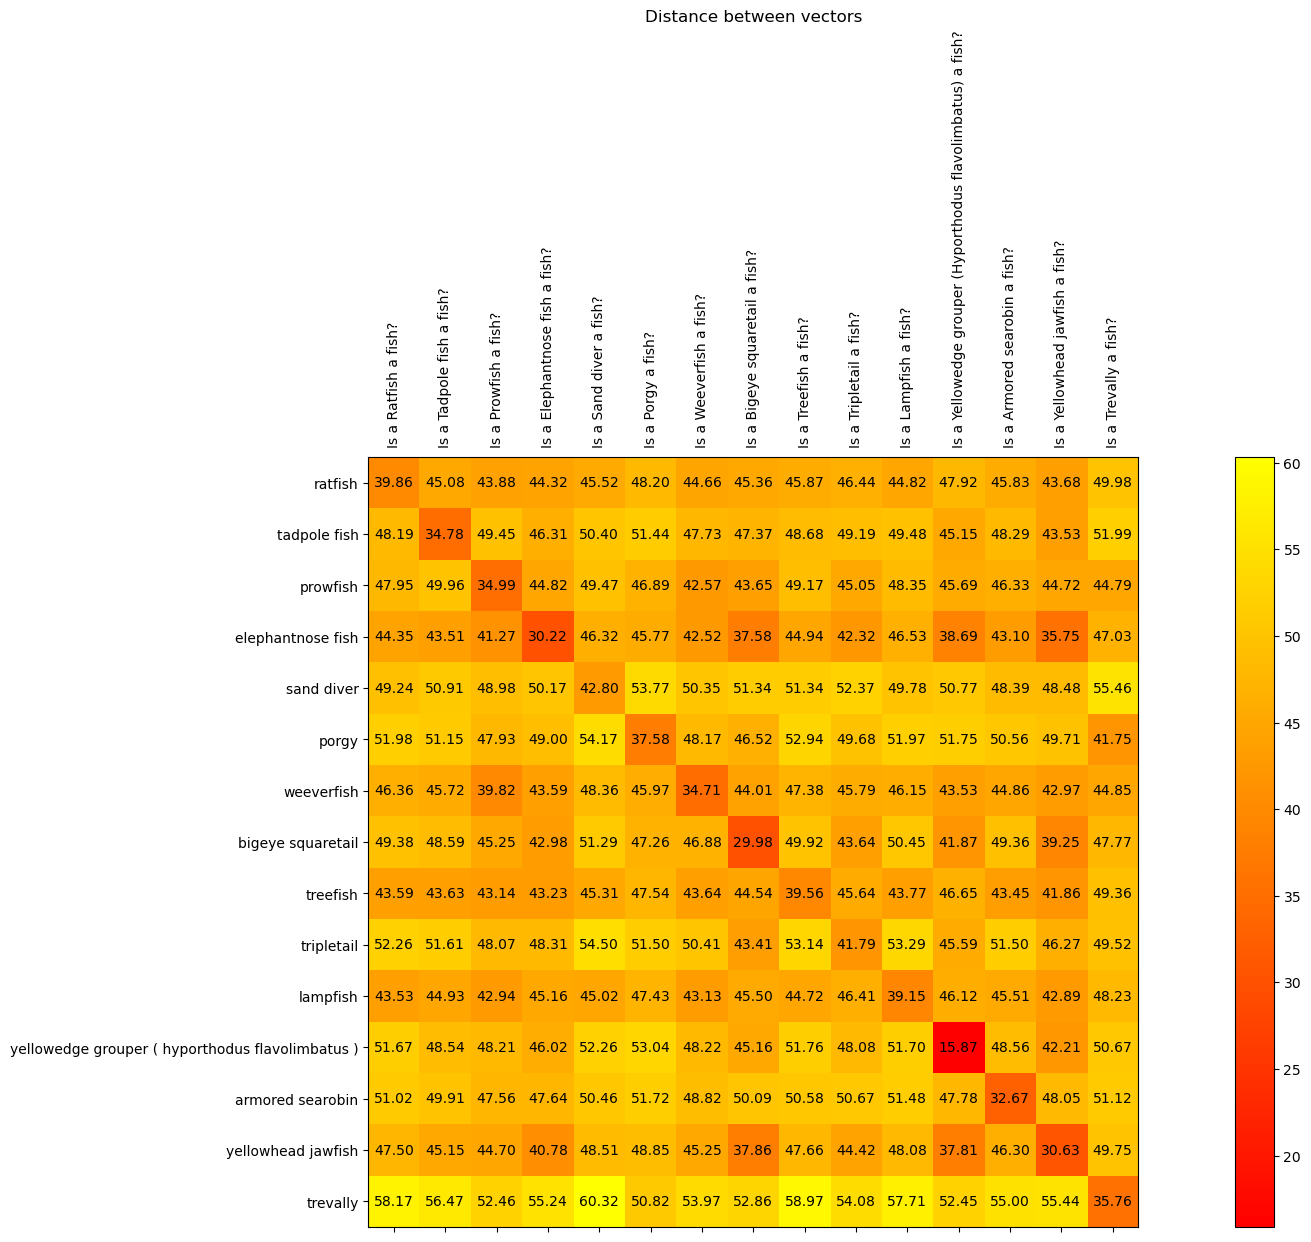

In [10]:
# Plotting Results in Heatmap
plt.figure(figsize=(25, 10)) 
plt.imshow(angleMatrix, cmap='autumn')

# Add cell values as text annotations
for i in range(len(vecEmbedsFish)):
    for j in range(len(vecEmbedsFish2_reshaped)):
        plt.annotate(f'{angleMatrix[i][j]:.2f}', xy=(j, i), ha='center', va='center')

plt.title("Distance between vectors") 
plt.xticks(np.arange(len(list_of_strings)), list_of_strings, rotation=90) #prompts
plt.yticks(np.arange(len(vecName)), vecName) # animal words
plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.colorbar()